In [1]:
import sys
import os

# Get the absolute path to the project directory
project_dir = os.path.abspath("..")

# Append the project directory to sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

In [2]:
import sys
import os

# Get the absolute path to the project directory
project_dir = os.path.abspath("..")

# Append the project directory to sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import msgpack
import warnings
from dataclasses import asdict, is_dataclass, dataclass
import os
import msgpack
import json
import pickle
from pandas.api.types import is_datetime64_any_dtype
import scipy
import numpy as np
from scipy.stats import linregress

from src.common.AssetData import AssetData
from src.common.AssetDataService import AssetDataService
from src.common.AssetFileInOut import AssetFileInOut 
from src.databaseService.OutsourceLoader import OutsourceLoader

from src.simulation.SimulatePortfolio import SimulatePortfolio
from src.strategy.StratBuyAndHold import StratBuyAndHold
from src.simulation.ResultAnalyzer import ResultAnalyzer
from src.common.AssetFileInOut import AssetFileInOut
from src.mathTools.CurveAnalysis import CurveAnalysis
from src.predictionModule.FourierML import FourierML
from src.common.YamlTickerInOut import YamlTickerInOut
from src.common.DataFrameTimeOperations import DataFrameTimeOperationsPandas as DFTO


In [3]:
from scipy.special import ellipk, ellipe
from keras.datasets import mnist

A = np.array([
    [1 + 2j, 3 + 4j],
    [5 + 6j, 7 + 8j]
])
B=np.abs(A)
np.minimum(B,2)

array([[2., 2.],
       [2., 2.]])

In [4]:
import numpy as np
from tensorflow.keras.datasets import mnist
from scipy.special import ellipk, ellipe
from scipy.linalg import eig
from numpy import pi, sin, sqrt, arccos, minimum

# Load MNIST data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Select first samples for training
toSelect=10000
X_train_trunc = X_train[:toSelect].copy()
Y_train_trunc = Y_train[:toSelect].copy()

X_test_trunc = X_test[:toSelect].copy()
Y_test_trunc = Y_test[:toSelect].copy()

# Display the shapes
print("XTrain shape:", X_train_trunc.shape)  # Expected: (toSelect, 28, 28)
print("YTrain shape:", Y_train_trunc.shape)  # Expected: (toSelect,)
print("XTest shape:", X_test_trunc.shape)    # Expected: (toSelect, 28, 28)
print(np.max(X_train_trunc))
# One-hot encode YTrain and YTest
num_classes = 10
Ytrain = np.zeros((toSelect, num_classes))
Ytest = np.zeros((toSelect, num_classes))
labels = np.arange(10)

# Vectorized one-hot encoding
Ytrain[np.arange(toSelect), Y_train_trunc] = 1
Ytest[np.arange(toSelect), Y_test_trunc] = 1

# Reshape images to vectors
U = (X_train_trunc.reshape((toSelect, 28*28)) / np.max(X_train_trunc)).astype("float32")
Utest = (X_test_trunc.reshape((toSelect, 28*28)) / np.max(X_test_trunc)).astype("float32")

Util = Utest

XTrain shape: (10000, 28, 28)
YTrain shape: (10000,)
XTest shape: (10000, 28, 28)
255


False
False
False
False
False
False


C:\Users\KILightTouch\AppData\Local\Temp\ipykernel_7116\2598809779.py:6: RuntimeWarning: invalid value encountered in matmul
  tUmUT = U @ (U.T)


253.81668

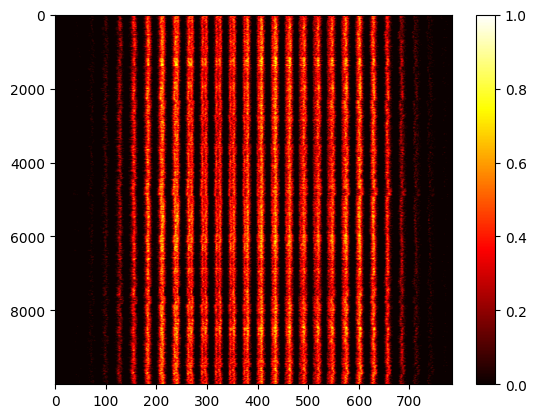

In [5]:
cax = plt.imshow(U, cmap='hot', aspect='auto')
plt.colorbar(cax)
print(np.any(np.isinf(U) | np.isnan(U)))
print(np.any(np.isinf(Utest) | np.isnan(Utest)))

tUmUT = U @ (U.T)
print(np.isnan(U).any())
print(np.isnan(U.T).any())
print(np.isinf(U).any())
print(np.isinf(U.T).any())
np.max(tUmUT)

In [6]:
epsilon = 1e-15

absU = np.sqrt(np.sum(U**2, axis=1))
absUtil = np.sqrt(np.sum(Util**2, axis=1))
absU_outer = np.outer(absU,absU)
absUtil_outer = np.outer(absUtil,absU)
UmUT = U @ U.T
UtilmUT = Util @ U.T

theta = np.arccos(UmUT / (absU_outer))
thetatil = np.arccos(UtilmUT / (absUtil_outer))

np.fill_diagonal(theta, 0)

cosSq = np.cos(theta)**2
sinAbs = np.abs(np.sin(theta))
sinSq = sinAbs**2
posQuo = cosSq / sinSq

cosSqtil = np.cos(thetatil)**2
sinAbstil = np.abs(np.sin(thetatil))
sinSqtil = sinAbstil**2
posQuotil = cosSqtil / sinSqtil

np.fill_diagonal(posQuo, 0)

assert not (np.isinf(posQuo).any() or np.isnan(posQuo).any())
assert not (np.isinf(posQuotil).any() or np.isnan(posQuotil).any())

C:\Users\KILightTouch\AppData\Local\Temp\ipykernel_7116\582598936.py:7: RuntimeWarning: invalid value encountered in matmul
  UmUT = U @ U.T
C:\Users\KILightTouch\AppData\Local\Temp\ipykernel_7116\582598936.py:10: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(UmUT / (absU_outer))
C:\Users\KILightTouch\AppData\Local\Temp\ipykernel_7116\582598936.py:18: RuntimeWarning: divide by zero encountered in divide
  posQuo = cosSq / sinSq


1.0
False
1.4017205e-06


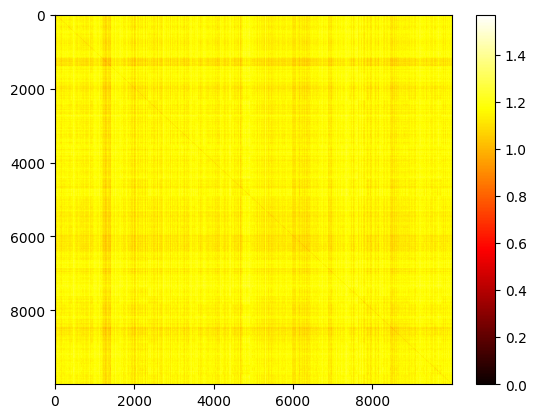

In [7]:
cax = plt.imshow(theta, cmap='hot', aspect='auto')
plt.colorbar(cax)

print(np.max(cosSq))
print(np.max(cosSq)>1)
print(np.min(cosSq))

In [8]:
# Compute elliptic integrals
assert not np.max(cosSq)>1
assert not np.max(cosSqtil)>1
assert not np.max(posQuo)<0
assert not np.max(posQuotil)<0

EKcosSq = ellipk(cosSq)
EEcosSq = ellipe(cosSq)
EKnegQuo = ellipk(np.minimum(posQuo,1) / (posQuo + 1)) / np.sqrt(1 + posQuo)

EKcosSqtil = ellipk(cosSqtil)
EEcosSqtil = ellipe(cosSqtil)
EKnegQuotil = ellipk(np.minimum(posQuotil,1) / (posQuotil + 1)) / np.sqrt(1 + posQuotil)

np.fill_diagonal(EKcosSq, 0)

False
False
False
False
False
False
False
False
False
False
False
False


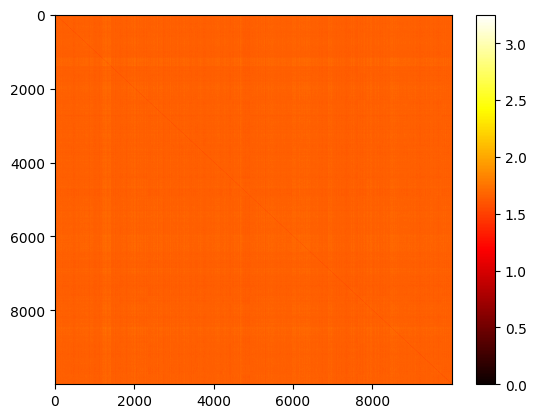

In [9]:
objToPlot = EKcosSq
cax = plt.imshow(objToPlot, cmap='hot', aspect='auto')
plt.colorbar(cax)
print(np.any(np.isinf(absU) | np.isnan(absU)))
print(np.any(np.isinf(absUtil) | np.isnan(absUtil)))
print(np.any(np.isinf(theta) | np.isnan(theta)))
print(np.any(np.isinf(thetatil) | np.isnan(thetatil)))
print(np.any(np.isinf(posQuo) | np.isnan(posQuo)))
print(np.any(np.isinf(posQuotil) | np.isnan(posQuotil)))
print(np.any(np.isinf(EKnegQuo) | np.isnan(EKnegQuo)))
print(np.any(np.isinf(EKnegQuotil) | np.isnan(EKnegQuotil)))
print(np.any(np.isinf(EKcosSq) | np.isnan(EKcosSq)))
print(np.any(np.isinf(EKcosSqtil) | np.isnan(EKcosSqtil)))
print(np.any(np.isinf(EEcosSq) | np.isnan(EEcosSq)))
print(np.any(np.isinf(EEcosSqtil) | np.isnan(EEcosSqtil)))


In [10]:
# Trapezoidal rule
NTrap = 40
delTheta = np.pi / 2 / (NTrap - 1)
thetaTrap = np.linspace(0, np.pi / 2, NTrap)
EEnegQuo = delTheta / 2 * np.ones_like(posQuo)
EEnegQuotil = delTheta / 2 * np.ones_like(posQuotil)

for nt in range(1, NTrap-1):
    EEnegQuo += delTheta * np.sqrt(1 + posQuo * np.sin(thetaTrap[nt])**2)
    EEnegQuotil += delTheta * np.sqrt(1 + posQuotil * np.sin(thetaTrap[nt])**2)

EEnegQuo += (delTheta / 2) * np.sqrt(1 + posQuo * np.sin(thetaTrap[-1])**2)
EEnegQuotil += (delTheta / 2) * np.sqrt(1 + posQuotil * np.sin(thetaTrap[-1])**2)

EEnegQuo = np.clip(EEnegQuo, -100, 100)
EEnegQuotil = np.clip(EEnegQuotil, -100, 100)


False
False
False
False
False
False
False
False
False
False


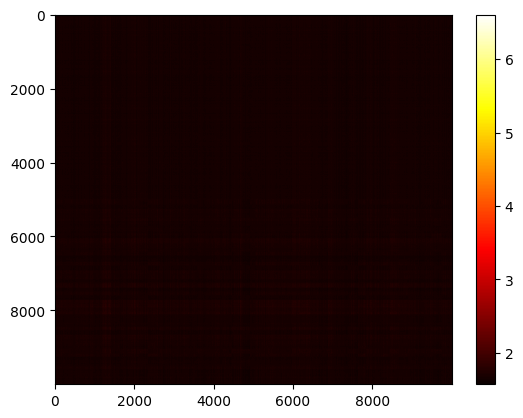

In [11]:
objToPlot = EEnegQuotil
cax = plt.imshow(objToPlot, cmap='hot', aspect='auto')
plt.colorbar(cax)
print(np.any(np.isinf(EEcosSqtil) | np.isnan(EEcosSqtil)))
print(np.any(np.isinf(EKcosSqtil) | np.isnan(EKcosSqtil)))
print(np.any(np.isinf(sinSq) | np.isnan(sinSq)))
print(np.any(np.isinf(sinSqtil) | np.isnan(sinSqtil)))
print(np.any(np.isinf(EEcosSq) | np.isnan(EEcosSq)))
print(np.any(np.isinf(EKcosSq) | np.isnan(EKcosSq)))
print(np.any(np.isinf(sinSq) | np.isnan(sinSq)))
print(np.any(np.isinf(sinSqtil) | np.isnan(sinSqtil)))
print(np.any(np.isinf(EKnegQuo) | np.isnan(EKnegQuo)))
print(np.any(np.isinf(EKnegQuotil) | np.isnan(EKnegQuotil)))


In [12]:
K = (absU_outer / 2) * (-sinSq * EKcosSq + 2 * EEcosSq + sinAbs * (2 * EEnegQuo - EKnegQuo) + 2 * np.eye(toSelect))
Ktil = (absUtil_outer / 2) * (-sinSqtil * EKcosSqtil + 2 * EEcosSqtil + sinAbstil * (2 * EEnegQuotil - EKnegQuotil))

# Compute best gamma and accuracy
accuracy = np.zeros(len(labels))
eigK = np.linalg.eigvalsh(K)
eigK = np.sort(eigK.real)

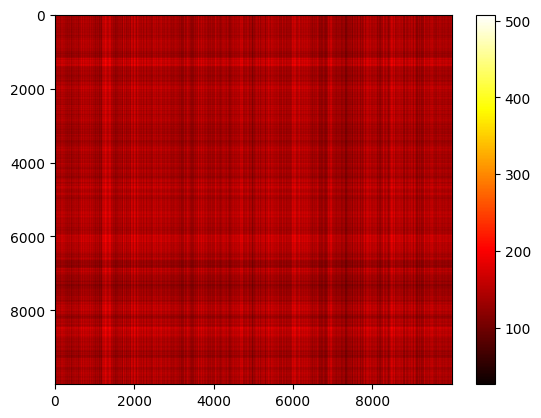

In [13]:
objToPlot = K
cax = plt.imshow(objToPlot, cmap='hot', aspect='auto')
plt.colorbar(cax)

In [14]:
g = (eigK[0]+eigK[1])/2
Ytil = Ktil @ np.linalg.solve(K - g* np.eye(toSelect), Ytrain)

Y_pred = np.argmax(Ytil, axis=1)

# Actual class labels
Y_true = Y_test_trunc

# Calculate accuracy
accuracy = np.mean(Y_pred == Y_true)

print("Accuracy:", accuracy)

Accuracy: 0.956
